# 2.	Build a Multiclass image classification model with InceptionV3 and Mobilenet pretrained network.

In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3, MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os

In [5]:
# Define data paths
train_path = 'C:/Users/Abhisek Das/Desktop/learing mphasis/PHASE 2/1. AI SOLUTION DEVELOPER/PE- Answers/Deep Learning/PE-16/train'
test_path = 'C:/Users/Abhisek Das/Desktop/learing mphasis/PHASE 2/1. AI SOLUTION DEVELOPER/PE- Answers/Deep Learning/PE-16/test'

# Use ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Get the number of classes dynamically
NUM_CLASSES = len(os.listdir(train_path))

# Load and preprocess the data
train_set = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=True)
test_set = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)


Found 768 images belonging to 2 classes.
Found 336 images belonging to 2 classes.


In [7]:

# InceptionV3 Model
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model_inception.layers:
    layer.trainable = False  # Freeze the layers

# Build the custom model on top of InceptionV3
inception_model = Sequential()
inception_model.add(base_model_inception)
inception_model.add(GlobalAveragePooling2D())
inception_model.add(Dense(512, activation='relu'))
inception_model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
inception_history = inception_model.fit(train_set, validation_data=test_set, epochs=10, steps_per_epoch=len(train_set), validation_steps=len(test_set))

# MobileNetV2 Model
base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model_mobilenet.layers:
    layer.trainable = False  # Freeze the layers

# Build the custom model on top of MobileNetV2
mobilenet_model = Sequential()
mobilenet_model.add(base_model_mobilenet)
mobilenet_model.add(GlobalAveragePooling2D())
mobilenet_model.add(Dense(512, activation='relu'))
mobilenet_model.add(Dense(NUM_CLASSES, activation='softmax')) 

Epoch 1/10
24/24 [==============================] - 75s 3s/step - loss: 0.4831 - accuracy: 0.8919 - val_loss: 0.0735 - val_accuracy: 0.9762
Epoch 2/10
24/24 [==============================] - 68s 3s/step - loss: 0.0389 - accuracy: 0.9844 - val_loss: 0.0735 - val_accuracy: 0.9762
Epoch 3/10
24/24 [==============================] - 69s 3s/step - loss: 0.0263 - accuracy: 0.9883 - val_loss: 0.0920 - val_accuracy: 0.9762
Epoch 4/10
24/24 [==============================] - 69s 3s/step - loss: 0.0152 - accuracy: 0.9935 - val_loss: 0.0804 - val_accuracy: 0.9792
Epoch 5/10
24/24 [==============================] - 69s 3s/step - loss: 0.0106 - accuracy: 0.9974 - val_loss: 0.0663 - val_accuracy: 0.9792
Epoch 6/10
24/24 [==============================] - 68s 3s/step - loss: 0.0159 - accuracy: 0.9935 - val_loss: 0.0679 - val_accuracy: 0.9821
Epoch 7/10
24/24 [==============================] - 69s 3s/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0655 - val_accuracy: 0.9851
Epoch 8/10
24/24 [==

In [8]:
# Compile the model
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mobilenet_history = mobilenet_model.fit(train_set, validation_data=test_set, epochs=10, steps_per_epoch=len(train_set), validation_steps=len(test_set))

# Save the models if needed
inception_model.save('inception_model.h5')
mobilenet_model.save('mobilenet_model.h5')


Epoch 1/10
24/24 [==============================] - 44s 2s/step - loss: 0.3705 - accuracy: 0.8672 - val_loss: 0.1191 - val_accuracy: 0.9643
Epoch 2/10
24/24 [==============================] - 34s 1s/step - loss: 0.0876 - accuracy: 0.9688 - val_loss: 0.0718 - val_accuracy: 0.9792
Epoch 3/10
24/24 [==============================] - 33s 1s/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.0758 - val_accuracy: 0.9762
Epoch 4/10
24/24 [==============================] - 33s 1s/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0817 - val_accuracy: 0.9792
Epoch 5/10
24/24 [==============================] - 33s 1s/step - loss: 0.0148 - accuracy: 0.9948 - val_loss: 0.0712 - val_accuracy: 0.9851
Epoch 6/10
24/24 [==============================] - 33s 1s/step - loss: 0.0101 - accuracy: 0.9948 - val_loss: 0.0864 - val_accuracy: 0.9762
Epoch 7/10
24/24 [==============================] - 33s 1s/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0734 - val_accuracy: 0.9792
Epoch 8/10
24/24 [==

C:\Users\Abhisek Das\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

# Visualize training history if needed
# ... (similar to the previous examples)



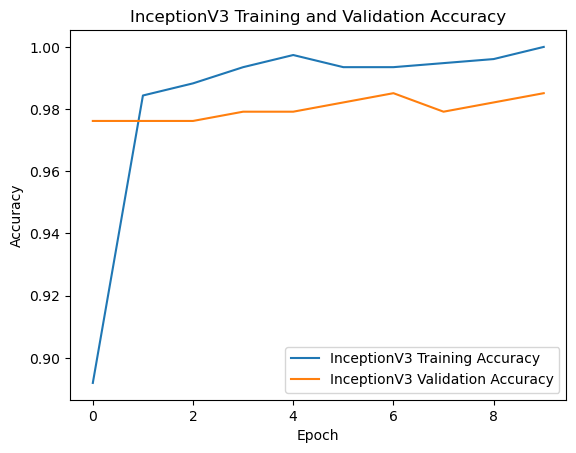

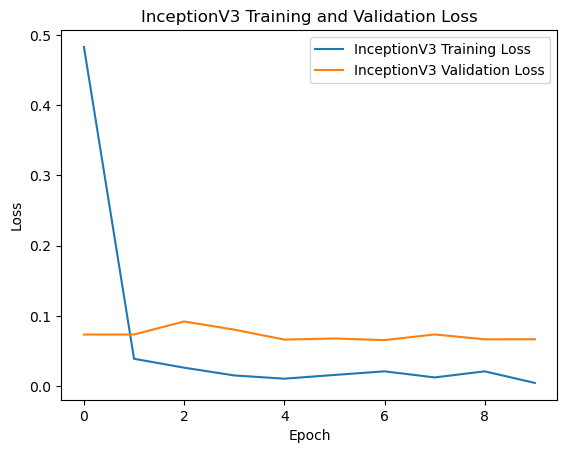

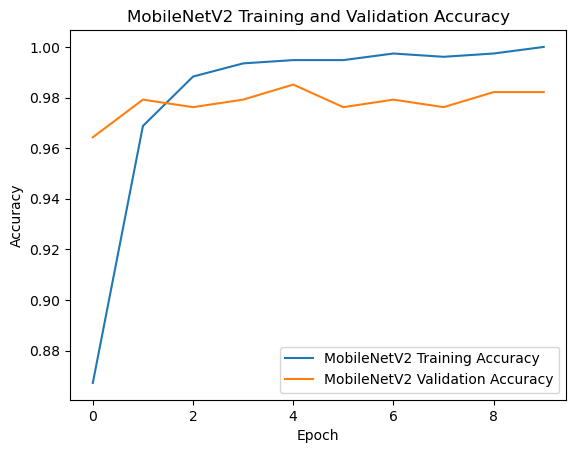

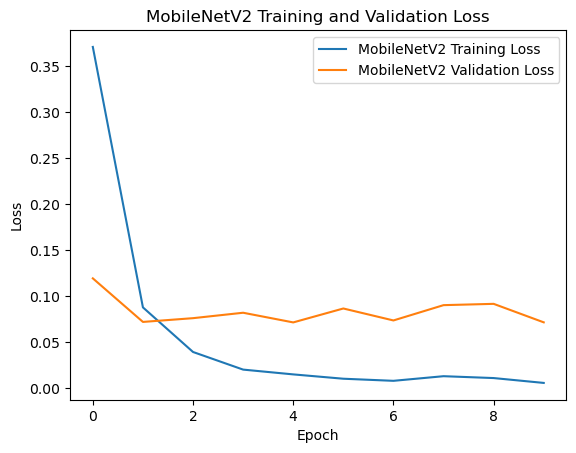

In [9]:
import matplotlib.pyplot as plt

# Visualize training history for InceptionV3
plt.plot(inception_history.history['accuracy'], label='InceptionV3 Training Accuracy')
plt.plot(inception_history.history['val_accuracy'], label='InceptionV3 Validation Accuracy')
plt.title('InceptionV3 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(inception_history.history['loss'], label='InceptionV3 Training Loss')
plt.plot(inception_history.history['val_loss'], label='InceptionV3 Validation Loss')
plt.title('InceptionV3 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize training history for MobileNetV2
plt.plot(mobilenet_history.history['accuracy'], label='MobileNetV2 Training Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNetV2 Validation Accuracy')
plt.title('MobileNetV2 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(mobilenet_history.history['loss'], label='MobileNetV2 Training Loss')
plt.plot(mobilenet_history.history['val_loss'], label='MobileNetV2 Validation Loss')
plt.title('MobileNetV2 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
 